In [14]:
#importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
DatetimeIndex(['2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
               '2020-11-25', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-29', '2021-01-31',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
               '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11',
               '2021-02-12', '2021-04-13', '2021-04-14', '2021-04-15',
               '2021-04-16'],
              dtype='datetime64[ns]', name='Date', freq=None)


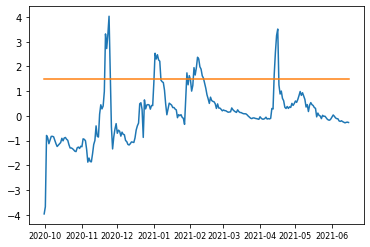

In [15]:
#this is a bubble detecting algorithm developed by Phillips and Yu (2011) and Phillips et al. (2015) 
#it is based on the augmented Dickey-Fuller test

#downloading data
ticker = 'DOGE-USD'
start = '2020-09-01'
end = '2021-06-15'
prices = yf.download(ticker, start, end)['Close']
#inputting the parameters
r0 = int(len(prices)*0.1)
#specify lags for the augmented Dickey-Fuller (ADF) test
adf_lags = 3
#critical value of the right-tailed ADF-test (95%) from Phillips et al. (2015)
crit = 1.49
#transforming data
log_prices = np.array(np.log(prices))
delta_log_prices = log_prices[1:] - log_prices[:-1]
n = len(delta_log_prices)
BSADF = np.array([])
#calculating ADF stats
for r2 in range(r0,n):
    ADFS = np.array([])
    for r1 in range(0,r2-r0+1):
        X0 = log_prices[r1:r2+1]
        X = pd.DataFrame()
        X[0] = X0
        for j in range(1,adf_lags+1):
            X[j] = np.append(np.zeros(j),delta_log_prices[r1:r2+1-j])
        X = np.array(X)
        Y = delta_log_prices[r1:r2+1]
        reg = sm.OLS(Y,sm.add_constant(X))
        res = reg.fit()
        ADFS = np.append(ADFS, res.params[1]/res.bse[1])
    BSADF = np.append(BSADF, max(ADFS))
#visualising the results
plt.rc('xtick',labelsize = 8)
plt.plot(prices.index[r0+1:],BSADF)
plt.plot(prices.index[r0+1:],np.ones(len(BSADF))*crit)
#printing dates when bubbles were detected
print(prices.index[r0+1:][BSADF > crit])